### Part 1 - Building up a basic predictive model

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [139]:
df= pd.read_csv('Manhattan12.csv')
df.head(5)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APART\nMENT\nNUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE\nPRICE,SALE DATE
0,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1306,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$2,214,693",20/05/2013
1,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1307,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,654,656",16/05/2013
2,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1308,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,069,162",23/05/2013
3,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1309,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,374,637",15/05/2013
4,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1310,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,649,565",13/05/2013


### 1.Data cleaning and transformation

### show the shape of the dataset

In [140]:
df.shape

(27395, 21)

### Rename inccorectly formated column name 

In [141]:
df.rename(columns = {'SALE\nPRICE':'SALES'}, inplace = True)


In [142]:
df.rename(columns = {'BUILDING CLASS CATEGORY':'BUILDING_CLASS_CATEGORY'}, inplace = True)

In [143]:
df.rename(columns = {'BUILDING CLASS AT PRESENT':'BUILDING_CLASS_PRESENT'}, inplace = True)

In [144]:
df.rename(columns = {'RESIDENTIAL UNITS':'RESIDENTIAL_UNITS'}, inplace = True)

In [145]:
df.rename(columns = {'COMMERCIAL UNITS':'COMMERCIAL_UNITS'}, inplace = True)

In [146]:
df.rename(columns = {'TOTAL UNITS':'TOTAL_UNITS'}, inplace = True)

In [147]:
df.rename(columns = {'LAND SQUARE FEET':'LAND_SQUARE_FEET'}, inplace = True)

In [148]:
df.rename(columns = {'TAX CLASS AT PRESENT':'TAX_CLASS_AT_PRESENT'}, inplace = True)

In [149]:
df.rename(columns = {'GROSS SQUARE FEET':'GROSS_SQUARE_FEET'}, inplace = True)

In [150]:
df.rename(columns = {'YEAR BUILT':'YEAR_BUILT'}, inplace = True)

In [151]:
df.rename(columns = {'TAX CLASS AT TIME OF SAL':'TAX_CLASS_AT_TIME_OF_SAL'}, inplace = True)

In [152]:
df.rename(columns = {'BUILDING CLASS AT TIME OF SALE	':'BUILDING_CLASS_AT_TIME_OF_SALE'}, inplace = True)

In [153]:
df.rename(columns = {'TAX CLASS AT TIME OF SALE':'TAX_CLASS_AT_TIME_OF_SALE'}, inplace = True)

In [154]:
df.rename(columns = {'BUILDING CLASS AT TIME OF SALE':'BUILDING_CLASS_AT_TIME_OF_SALE'}, inplace = True)  

In [155]:
df.rename(columns = {'ZIP CODE':'ZIP_CODE'}, inplace = True)   

In [156]:
df.rename(columns = {'APART\nMENT\nNUMBER':'APARTMENTNum'}, inplace = True)

In [157]:
df.rename(columns = {'SALE DATE':'SALE_DATE'}, inplace = True )

In [158]:
df.rename(columns = {'EASE-MENT':'EASE_MENT'}, inplace = True )

In [159]:
df.head(5)

,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,EASE_MENT,BUILDING_CLASS_PRESENT,ADDRESS,APARTMENTNum,...,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALES,SALE_DATE
0,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1306,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$2,214,693",20/05/2013
1,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1307,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,654,656",16/05/2013
2,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1308,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,069,162",23/05/2013
3,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1309,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,374,637",15/05/2013
4,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1310,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,649,565",13/05/2013


### for each numberical coulmn remove ',' the '$' for each sale price and then convert them into numeric

In [160]:
# Remove the "," and "$" symbols and convert them into numeric values
df['SALES'] = pd.to_numeric(df['SALES'].str.replace(',', '').str.replace('$', '') )

C:\Users\DDC\AppData\Local\Temp\ipykernel_10216\4069139983.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['SALES'] = pd.to_numeric(df['SALES'].str.replace(',', '').str.replace('$', '') )


In [161]:
df.head(3)

,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,EASE_MENT,BUILDING_CLASS_PRESENT,ADDRESS,APARTMENTNum,...,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALES,SALE_DATE
0,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1306,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,2214693,20/05/2013
1,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1307,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,1654656,16/05/2013
2,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1308,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,1069162,23/05/2013


convert Sale date colum into datetime

In [162]:
# Convert the Sale date column to datetime format
df['SALE_DATE'] = pd.to_datetime(df['SALE_DATE'])

C:\Users\DDC\AppData\Local\Temp\ipykernel_10216\3479763959.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['SALE_DATE'] = pd.to_datetime(df['SALE_DATE'])


In [163]:
df.head(3)

,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,EASE_MENT,BUILDING_CLASS_PRESENT,ADDRESS,APARTMENTNum,...,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALES,SALE_DATE
0,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1306,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,2214693,2013-05-20
1,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1307,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,1654656,2013-05-16
2,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1308,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,1069162,2013-05-23


In [164]:
df.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING_CLASS_CATEGORY',
       'TAX_CLASS_AT_PRESENT', 'BLOCK', 'LOT', 'EASE_MENT',
       'BUILDING_CLASS_PRESENT', 'ADDRESS', 'APARTMENTNum', 'ZIP_CODE',
       'RESIDENTIAL_UNITS', 'COMMERCIAL_UNITS', 'TOTAL_UNITS',
       'LAND_SQUARE_FEET', 'GROSS_SQUARE_FEET', 'YEAR_BUILT',
       'TAX_CLASS_AT_TIME_OF_SALE', 'BUILDING_CLASS_AT_TIME_OF_SALE', 'SALES',
       'SALE_DATE'],
      dtype='object')

### for each categorical varibale remove the spaces and then replaces the empty string by NaN

In [165]:

# Replace empty strings with NaN values in categorical variables
df['BUILDING_CLASS_CATEGORY'] = df['BUILDING_CLASS_CATEGORY'].replace('', np.nan)
df['ADDRESS'] = df['ADDRESS'].replace('', np.nan)

In [166]:
df.shape

(27395, 21)

In [167]:
df.head(3)

,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,EASE_MENT,BUILDING_CLASS_PRESENT,ADDRESS,APARTMENTNum,...,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALES,SALE_DATE
0,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1306,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,2214693,2013-05-20
1,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1307,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,1654656,2013-05-16
2,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1308,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,1069162,2013-05-23


In [168]:
df.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING_CLASS_CATEGORY',
       'TAX_CLASS_AT_PRESENT', 'BLOCK', 'LOT', 'EASE_MENT',
       'BUILDING_CLASS_PRESENT', 'ADDRESS', 'APARTMENTNum', 'ZIP_CODE',
       'RESIDENTIAL_UNITS', 'COMMERCIAL_UNITS', 'TOTAL_UNITS',
       'LAND_SQUARE_FEET', 'GROSS_SQUARE_FEET', 'YEAR_BUILT',
       'TAX_CLASS_AT_TIME_OF_SALE', 'BUILDING_CLASS_AT_TIME_OF_SALE', 'SALES',
       'SALE_DATE'],
      dtype='object')

### replace the zeros inprice land squares by Nan

In [169]:
# Replace zeros with NaN values in the Price_Land_Squares column

df['LAND_SQUARE_FEET'] = df['LAND_SQUARE_FEET'].replace(0, np.nan)
df['SALES'] = df['SALES'].replace(0, np.nan)


In [170]:
df.head(10)

,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,EASE_MENT,BUILDING_CLASS_PRESENT,ADDRESS,APARTMENTNum,...,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALES,SALE_DATE
0,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1306,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,2214693.0,2013-05-20
1,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1307,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,1654656.0,2013-05-16
2,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1308,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,1069162.0,2013-05-23
3,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1309,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,1374637.0,2013-05-15
4,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1310,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,1649565.0,2013-05-13
5,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1311,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,1705568.0,2013-05-21
6,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1312,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,2036500.0,2013-10-07
7,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1314,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,2214693.0,2013-04-06
8,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1317,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,2418343.0,2013-05-31
9,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1318,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,2749275.0,2013-05-24


### show summary of all missing values as well as the summary statistics

In [171]:
# Show the summary of missing values
print("Missing Values Summary:\n")
print(df.isnull().sum())

# Show the summary statistics
print("\nSummary Statistics:\n")
print(df.describe())

Missing Values Summary:

BOROUGH                              0
NEIGHBORHOOD                         0
BUILDING_CLASS_CATEGORY              0
TAX_CLASS_AT_PRESENT                 0
BLOCK                                0
LOT                                  0
EASE_MENT                            0
BUILDING_CLASS_PRESENT               0
ADDRESS                              0
APARTMENTNum                         0
ZIP_CODE                             0
RESIDENTIAL_UNITS                    0
COMMERCIAL_UNITS                     0
TOTAL_UNITS                          0
LAND_SQUARE_FEET                     0
GROSS_SQUARE_FEET                    0
YEAR_BUILT                           0
TAX_CLASS_AT_TIME_OF_SALE            0
BUILDING_CLASS_AT_TIME_OF_SALE       0
SALES                             7593
SALE_DATE                            0
dtype: int64

Summary Statistics:

       BOROUGH         BLOCK           LOT      ZIP_CODE  COMMERCIAL_UNITS  \
count  27395.0  27395.000000  27395.000000 

###  Drop the BOROUG and EASE_MENT columns

In [172]:
# Drop the BOROUG and EASE_MENT columns
df = df.drop(columns=['BOROUGH', 'EASE_MENT',"APARTMENTNum"])

In [173]:
df.head(7)

,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,BUILDING_CLASS_PRESENT,ADDRESS,ZIP_CODE,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALES,SALE_DATE
0,,13 CONDOS - ELEVATOR APARTMENTS,,738,1306,,345 WEST 14TH STREET,10014,0,0,0,0,0,0,2,R4,2214693.0,2013-05-20
1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1307,,345 WEST 14TH STREET,10014,0,0,0,0,0,0,2,R4,1654656.0,2013-05-16
2,,13 CONDOS - ELEVATOR APARTMENTS,,738,1308,,345 WEST 14TH STREET,10014,0,0,0,0,0,0,2,R4,1069162.0,2013-05-23
3,,13 CONDOS - ELEVATOR APARTMENTS,,738,1309,,345 WEST 14TH STREET,10014,0,0,0,0,0,0,2,R4,1374637.0,2013-05-15
4,,13 CONDOS - ELEVATOR APARTMENTS,,738,1310,,345 WEST 14TH STREET,10014,0,0,0,0,0,0,2,R4,1649565.0,2013-05-13
5,,13 CONDOS - ELEVATOR APARTMENTS,,738,1311,,345 WEST 14TH STREET,10014,0,0,0,0,0,0,2,R4,1705568.0,2013-05-21
6,,13 CONDOS - ELEVATOR APARTMENTS,,738,1312,,345 WEST 14TH STREET,10014,0,0,0,0,0,0,2,R4,2036500.0,2013-10-07


### Drop duplicate rows

In [174]:
# Drop duplicate rows
df = df.drop_duplicates()

In [175]:
df.head(5)

,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,BUILDING_CLASS_PRESENT,ADDRESS,ZIP_CODE,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALES,SALE_DATE
0,,13 CONDOS - ELEVATOR APARTMENTS,,738,1306,,345 WEST 14TH STREET,10014,0,0,0,0,0,0,2,R4,2214693.0,2013-05-20
1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1307,,345 WEST 14TH STREET,10014,0,0,0,0,0,0,2,R4,1654656.0,2013-05-16
2,,13 CONDOS - ELEVATOR APARTMENTS,,738,1308,,345 WEST 14TH STREET,10014,0,0,0,0,0,0,2,R4,1069162.0,2013-05-23
3,,13 CONDOS - ELEVATOR APARTMENTS,,738,1309,,345 WEST 14TH STREET,10014,0,0,0,0,0,0,2,R4,1374637.0,2013-05-15
4,,13 CONDOS - ELEVATOR APARTMENTS,,738,1310,,345 WEST 14TH STREET,10014,0,0,0,0,0,0,2,R4,1649565.0,2013-05-13


In [176]:
df.shape

(25802, 18)

### Drop rows with NaN values

In [177]:
# Drop rows with NaN values
df = df.dropna()

In [178]:
df.shape

(18930, 18)

### Identify and remove outliers using the z-score method

In [179]:
import scipy.stats as stats

In [180]:
# Identify and remove outliers using the z-score method
z_scores = stats.zscore(df.select_dtypes(include=['float64']))
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df = df[filtered_entries]

In [181]:
df.shape

(18844, 18)

### Show the shape of the resulting DataFrame

In [182]:
print("Shape of the resulting DataFrame:", df.shape)

Shape of the resulting DataFrame: (18844, 18)


In [183]:
df.head()

,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,BUILDING_CLASS_PRESENT,ADDRESS,ZIP_CODE,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALES,SALE_DATE
0,,13 CONDOS - ELEVATOR APARTMENTS,,738,1306,,345 WEST 14TH STREET,10014,0,0,0,0,0,0,2,R4,2214693.0,2013-05-20
1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1307,,345 WEST 14TH STREET,10014,0,0,0,0,0,0,2,R4,1654656.0,2013-05-16
2,,13 CONDOS - ELEVATOR APARTMENTS,,738,1308,,345 WEST 14TH STREET,10014,0,0,0,0,0,0,2,R4,1069162.0,2013-05-23
3,,13 CONDOS - ELEVATOR APARTMENTS,,738,1309,,345 WEST 14TH STREET,10014,0,0,0,0,0,0,2,R4,1374637.0,2013-05-15
4,,13 CONDOS - ELEVATOR APARTMENTS,,738,1310,,345 WEST 14TH STREET,10014,0,0,0,0,0,0,2,R4,1649565.0,2013-05-13


### 2.Data Exploration

### visalise the price accross neighborhood

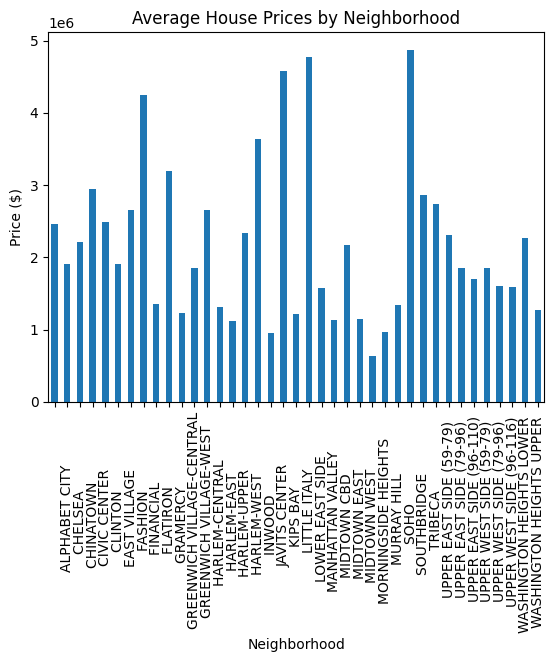

In [184]:
# Create a bar plot of the average price by neighborhood
df.groupby('NEIGHBORHOOD')['SALES'].mean().plot(kind='bar')

# Set the plot title and axis labels
plt.title('Average House Prices by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Price ($)')

# Show the plot
plt.show()

### Visalise the Prices over time

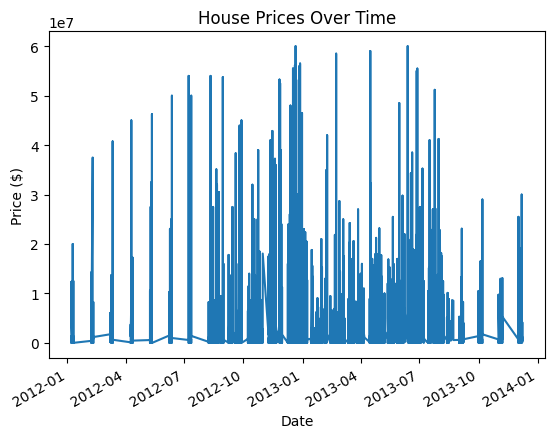

In [185]:
# Convert the 'date' column to a datetime object
df['SALE_DATE'] = pd.to_datetime(df['SALE_DATE'])

# Set the 'date' column as the index
df.set_index('SALE_DATE', inplace=True)

# Create a line plot of the house prices over time
df['SALES'].plot()

# Set the plot title and axis labels
plt.title('House Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price ($)')

# Show the plot
plt.show()

### Show the scatter matrix plot and the correlation matrix

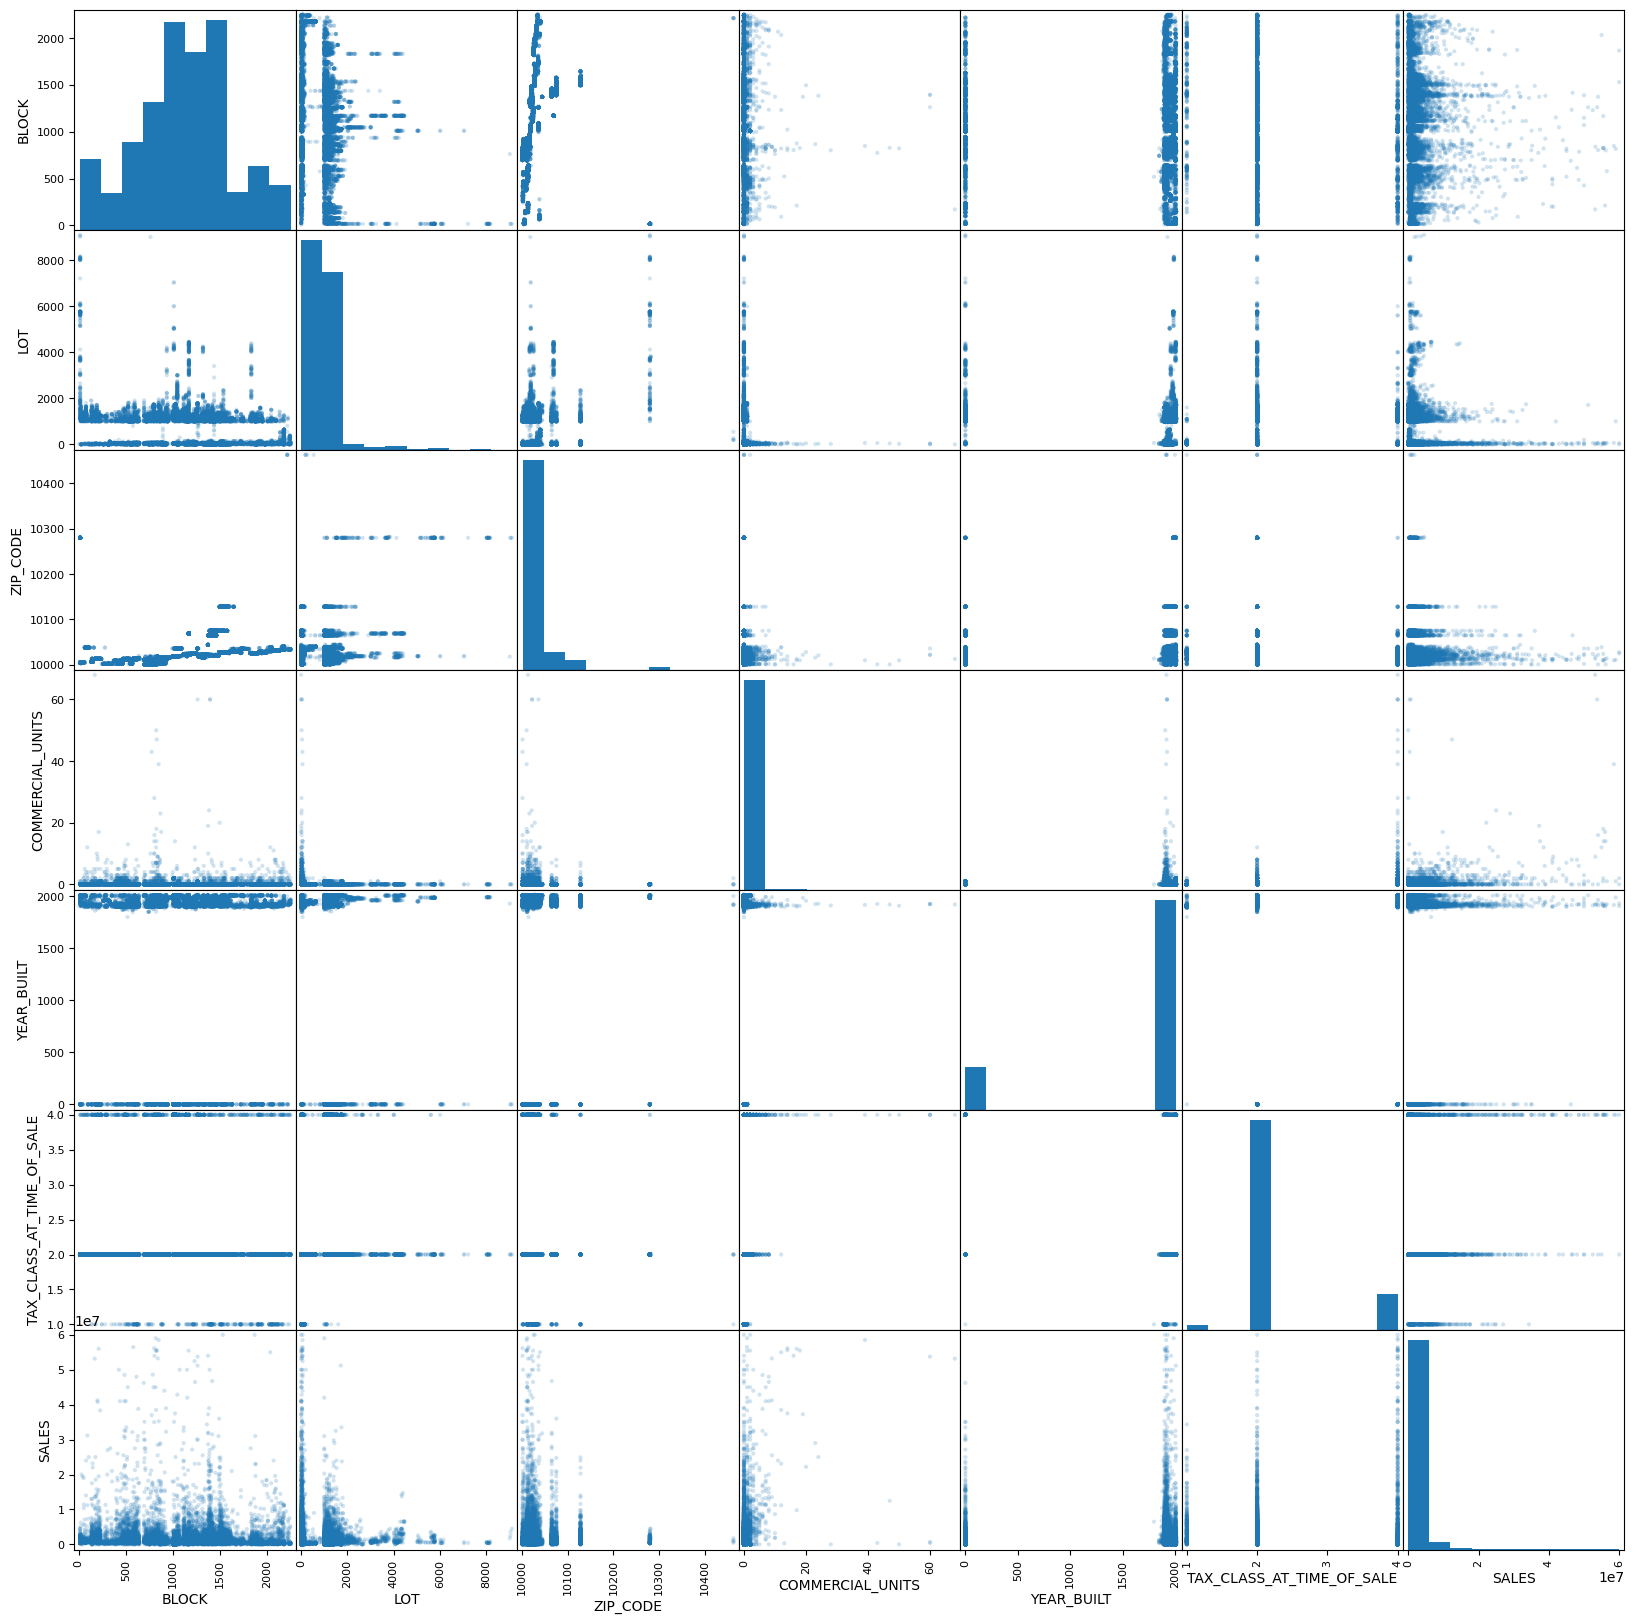

In [186]:
# Generate the scatter matrix plot
pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(20, 20), diagonal='hist')
plt.show()

###  correlation matrix

C:\Users\DDC\AppData\Local\Temp\ipykernel_10216\2856149077.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


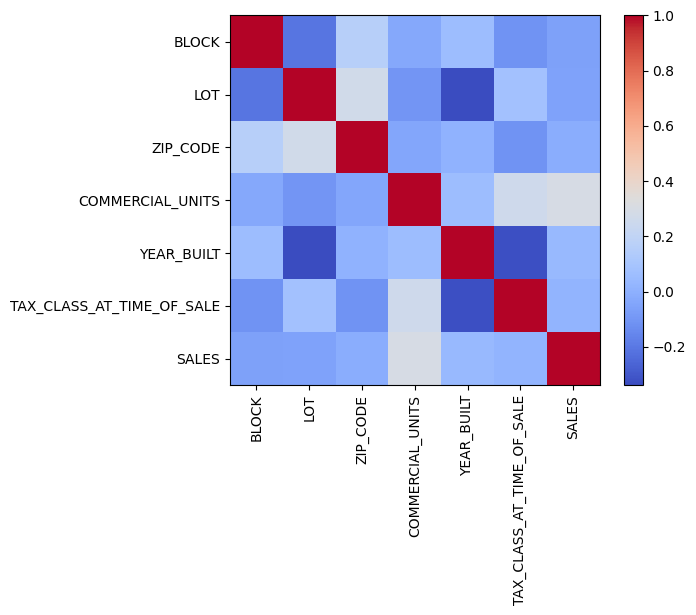

In [187]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Generate the correlation matrix plot
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.show()

### any further plots with demonstrate your understanding of the data 

In [188]:
df.columns

Index(['NEIGHBORHOOD', 'BUILDING_CLASS_CATEGORY', 'TAX_CLASS_AT_PRESENT',
       'BLOCK', 'LOT', 'BUILDING_CLASS_PRESENT', 'ADDRESS', 'ZIP_CODE',
       'RESIDENTIAL_UNITS', 'COMMERCIAL_UNITS', 'TOTAL_UNITS',
       'LAND_SQUARE_FEET', 'GROSS_SQUARE_FEET', 'YEAR_BUILT',
       'TAX_CLASS_AT_TIME_OF_SALE', 'BUILDING_CLASS_AT_TIME_OF_SALE', 'SALES'],
      dtype='object')

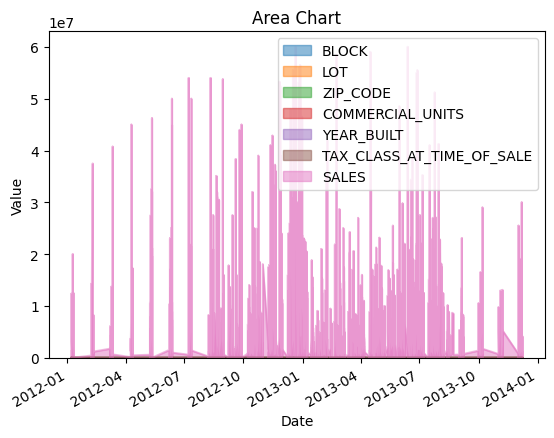

In [189]:
# Create the area chart
df.plot(kind='area', stacked=False, alpha=0.5)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Area Chart')

# Display the plot
plt.show()

### 3. Model Building . Consider the resulting dataframe

In [190]:
df.columns

Index(['NEIGHBORHOOD', 'BUILDING_CLASS_CATEGORY', 'TAX_CLASS_AT_PRESENT',
       'BLOCK', 'LOT', 'BUILDING_CLASS_PRESENT', 'ADDRESS', 'ZIP_CODE',
       'RESIDENTIAL_UNITS', 'COMMERCIAL_UNITS', 'TOTAL_UNITS',
       'LAND_SQUARE_FEET', 'GROSS_SQUARE_FEET', 'YEAR_BUILT',
       'TAX_CLASS_AT_TIME_OF_SALE', 'BUILDING_CLASS_AT_TIME_OF_SALE', 'SALES'],
      dtype='object')

In [191]:
# Select the relevant columns that would have an impact in predicting house prices
predictors = df[['NEIGHBORHOOD', 'GROSS_SQUARE_FEET', 'BUILDING_CLASS_PRESENT', 'TOTAL_UNITS', 'RESIDENTIAL_UNITS', 'BUILDING_CLASS_AT_TIME_OF_SALE', 'YEAR_BUILT']]

# Check the first few rows of the new DataFrame
print(predictors.head())

                         NEIGHBORHOOD GROSS_SQUARE_FEET  \
SALE_DATE                                                 
2013-05-20                                            0   
2013-05-16                                            0   
2013-05-23                                            0   
2013-05-15                                            0   
2013-05-13                                            0   

           BUILDING_CLASS_PRESENT TOTAL_UNITS RESIDENTIAL_UNITS  \
SALE_DATE                                                         
2013-05-20                                  0                 0   
2013-05-16                                  0                 0   
2013-05-23                                  0                 0   
2013-05-15                                  0                 0   
2013-05-13                                  0                 0   

           BUILDING_CLASS_AT_TIME_OF_SALE  YEAR_BUILT  
SALE_DATE                                              
2013

### build up a first linear model with appropriate predictors and evaluate it 

In [196]:
df.head(4)

,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,BUILDING_CLASS_PRESENT,ADDRESS,ZIP_CODE,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALES
SALE_DATE,,,,,,,,,,,,,,,,,
2013-05-20,,13 CONDOS - ELEVATOR APARTMENTS,,738,1306,,345 WEST 14TH STREET,10014,0,0,0,0,0,0,2,R4,2214693.0
2013-05-16,,13 CONDOS - ELEVATOR APARTMENTS,,738,1307,,345 WEST 14TH STREET,10014,0,0,0,0,0,0,2,R4,1654656.0
2013-05-23,,13 CONDOS - ELEVATOR APARTMENTS,,738,1308,,345 WEST 14TH STREET,10014,0,0,0,0,0,0,2,R4,1069162.0
2013-05-15,,13 CONDOS - ELEVATOR APARTMENTS,,738,1309,,345 WEST 14TH STREET,10014,0,0,0,0,0,0,2,R4,1374637.0


Cross-validation MSE scores: [6.44575424e+29 1.03904125e+31 1.20953484e+32 3.33054589e+27
 8.29103402e+29]
Average MSE score: 2.6564181262530864e+31


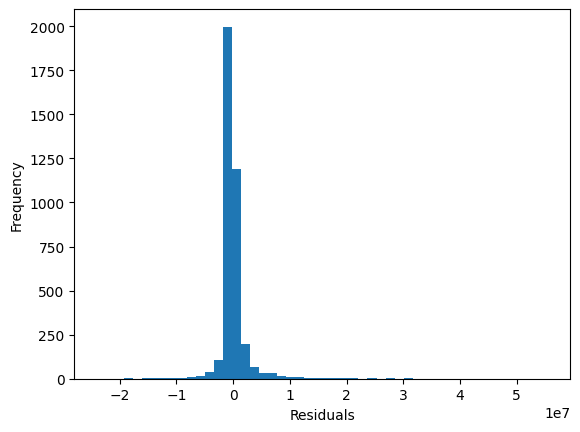

In [193]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


# Select the relevant predictors and target variable
X = df[['BUILDING_CLASS_PRESENT','RESIDENTIAL_UNITS','COMMERCIAL_UNITS', 'TOTAL_UNITS', 'TAX_CLASS_AT_TIME_OF_SALE']]
y = df['SALES']

# Perform one-hot encoding on the 'neighborhood' column
neighborhood_dummies = pd.get_dummies(X['BUILDING_CLASS_PRESENT'], prefix='BUILDING_CLASS_PRESENT')
X = pd.concat([X, neighborhood_dummies], axis=1)
X = X.drop('BUILDING_CLASS_PRESENT', axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model to the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model using cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
mse_scores = -cv_scores
print('Cross-validation MSE scores:', mse_scores)
print('Average MSE score:', mse_scores.mean())

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate the residuals
residuals = y_test - y_pred

# Plot a histogram of the residuals
plt.hist(residuals, bins=50)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [195]:

# Write a CSV file using the 'python' engine
df.to_csv("cleaned_Manhattan12_improvedModel.csv", index=False)